# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
from api_keys import WEATHER_API_KEY

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}q={city}&appid={WEATHER_API_KEY}'
    
    # Log the city, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | kenai
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | antakotako
City not found. Skipping...
Processing Record 7 of Set 1 | sanming
Processing Record 8 of Set 1 | tahe
Processing Record 9 of Set 1 | kapuskasing
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | ghadamis
Processing Record 14 of Set 1 | coahuayana de hidalgo
Processing Record 15 of Set 1 | el bauga
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | belyayevka
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | mahina
Processing Record 22

In [9]:
city_df = pd.DataFrame(city_data)

city_df.count()


City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [21]:
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kenai,60.5544,-151.2583,42.89,87,100,3.09,US,1714541374
1,margaret river,-33.9500,115.0667,72.09,57,100,6.99,AU,1714541106
2,kingston,17.9970,-76.7936,83.35,61,75,4.12,JM,1714541313
3,albany,42.6001,-73.9662,58.26,82,100,1.77,US,1714541254
4,sanming,26.2486,117.6186,65.26,91,100,1.20,CN,1714541377


In [14]:
city_df.to_csv('output_data/cities.csv', index_label='City_ID')

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from api_keys import WEATHER_API_KEY
from util.functions import plot_scatter, perform_regress

In [2]:
city_df = pd.read_csv('output_data/cities.csv', index_col='City_ID')
city_df['Date'] = pd.to_datetime(city_df['Date'], unit='s')
city_df['Date'] = city_df['Date'].dt.strftime('%m/%d/%y')
city_df['Max Temp'] = round((9/5) * (city_df['Max Temp'] - 273.15) + 32, 2) 
city_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kenai,60.5544,-151.2583,42.89,87,100,3.09,US,05/01/24
1,margaret river,-33.9500,115.0667,72.09,57,100,6.99,AU,05/01/24
2,kingston,17.9970,-76.7936,83.35,61,75,4.12,JM,05/01/24
3,albany,42.6001,-73.9662,58.26,82,100,1.77,US,05/01/24
4,sanming,26.2486,117.6186,65.26,91,100,1.20,CN,05/01/24


### Examine Relationships between latitude & other features via Scatter Plots to test correlation.

#### Latitude Vs. Temperature

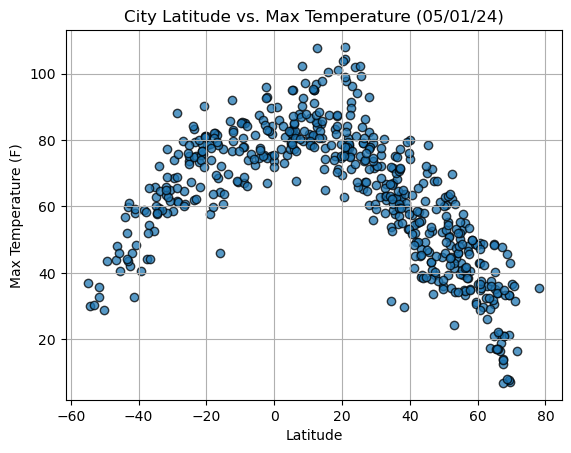

In [3]:
fig, ax = plot_scatter(city_df.Lat, city_df['Max Temp'], 'Latitude', 'Max Temperature (F)',
    f'City Latitude vs. Max Temperature ({city_df.iloc[0,8]})',
    edgecolor='black', alpha=.75) 

fig.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity


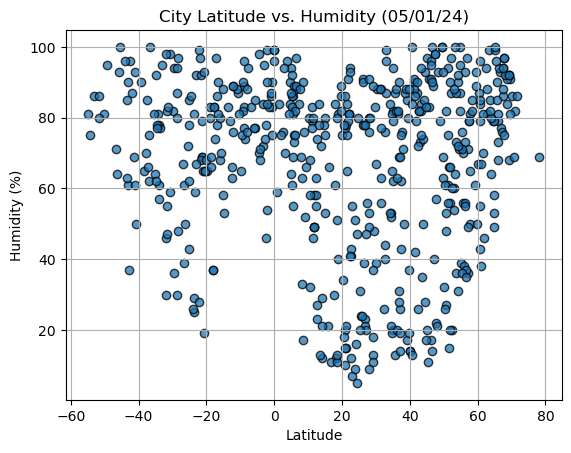

In [4]:
fig, ax = plot_scatter(city_df.Lat, city_df['Humidity'], 'Latitude', 'Humidity (%)',
    f'City Latitude vs. Humidity ({city_df.iloc[0,8]})', 
    edgecolor='black',alpha=.75) 

fig.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

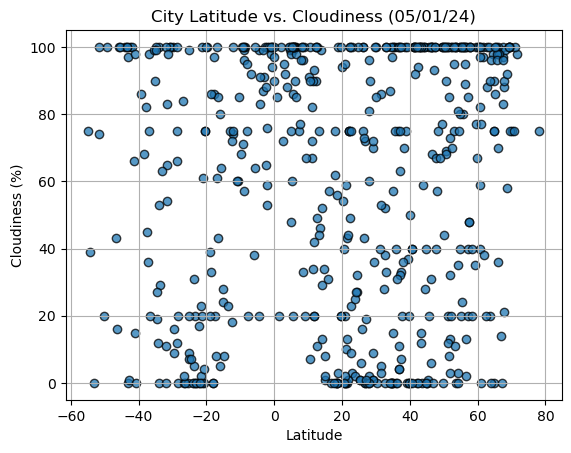

In [5]:
fig, ax = plot_scatter(city_df.Lat, city_df['Cloudiness'],'Latitude','Cloudiness (%)',
                       f'City Latitude vs. Cloudiness ({city_df.iloc[0,8]})', 
                       edgecolor='black', alpha=.75) 


fig.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

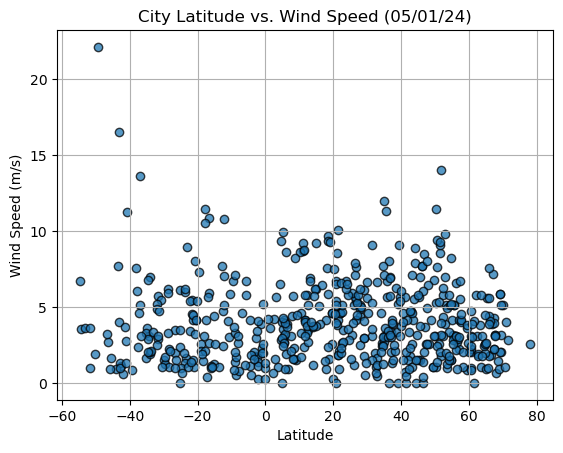

In [6]:
fig, ax = plot_scatter(city_df.Lat, city_df['Wind Speed'], 'Latitude','Wind Speed (m/s)',
    f'City Latitude vs. Wind Speed ({city_df.iloc[0,8]})',
    edgecolor='black', alpha=.75) 

fig.savefig("output_data/Fig4.png")

plt.show()

## Compute Linear Regression for Each Relationship - Sorted by North and South Hemispheres

In [7]:
# Dataframe of Northern Hemisphere (Lat >= 0)
northern_hemi_df = city_df.query('Lat > = 0').copy()
northern_hemi_df.sort_values(by='Lat').head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
298,sungai raya,0.7000,108.9000,89.85,59,85,4.19,ID,05/01/24
228,bikenibeu village,1.3673,173.1241,85.96,84,20,3.60,KI,05/01/24
324,lisala,2.1500,21.5167,77.34,75,100,0.67,CD,05/01/24
236,kudahuvadhoo,2.6708,72.8944,84.24,76,72,4.23,MV,05/01/24
539,isiro,2.7739,27.6160,72.95,94,95,1.59,CD,05/01/24


In [8]:
# Dataframe of Southern Hemisphere (Lat < 0)
southern_hemi_df = city_df.query('Lat < 0').copy()
southern_hemi_df.sort_values(by='Lat', ascending=False).head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
384,sao gabriel da cachoeira,-0.1303,-67.0892,73.71,99,90,1.00,BR,05/01/24
390,afua,-0.1567,-50.3867,75.38,96,100,1.28,BR,05/01/24
541,puerto leguizamo,-0.1934,-74.7819,71.98,99,97,0.29,CO,05/01/24
223,hithadhoo,-0.6000,73.0833,84.34,75,100,5.17,MV,05/01/24
240,port-gentil,-0.7193,8.7815,81.81,83,100,2.53,GA,05/01/24


###  Temperature vs. Latitude Linear Regression Plot

#### Observations 
##### Temperature vs Latitude
 - As we get closer to the equator (Lat 0), we notice in the southern and northern that the temperatures get higher. We can evaluate that distance to the equator has a strong correlation with temperature. As you get closer to the equator, temperatures rise, and as you go further away, temperatures fall. 
 - The correlations look exactly mirrored opposite from north and south hemispheres because north start from 0 and goes away from the equator, whilst the southern starts away from the equator and moves towards the equator.

The r value is: -0.8721104926603127


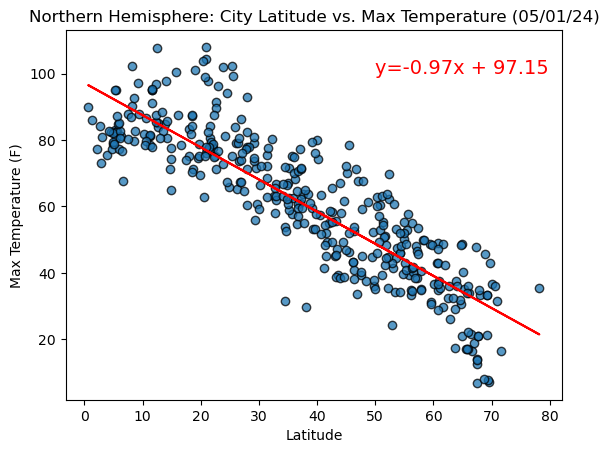

In [9]:
fig, ax, formula = plot_scatter(northern_hemi_df.Lat, northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (F)',
    f'Northern Hemisphere: City Latitude vs. Max Temperature ({city_df.iloc[0,8]})', regress=True, 
    edgecolor='black',alpha=.75) 

ax.text(50,100,formula, color='red', fontsize=14)

plt.show()

The r value is: 0.7903139976952847


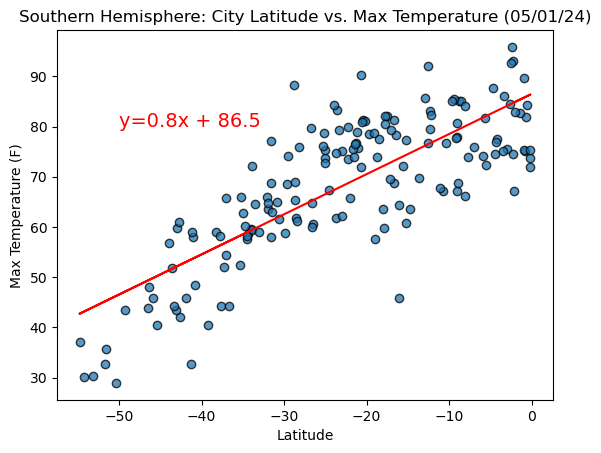

In [10]:
fig, ax, formula = plot_scatter(southern_hemi_df.Lat, southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (F)',
    f'Southern Hemisphere: City Latitude vs. Max Temperature ({city_df.iloc[0,8]})', regress=True, 
    edgecolor='black',alpha=.75)

ax.text(-50,80,formula, color='red', fontsize=14)

plt.show()

### Humidity vs. Latitude Linear Regression Plot

#### Observations 
##### Humidity vs Latitude
- The low r value close to 0 + the visual of the scatter plot tells us that the latitude and humidity have close to none or slight positive correlation, meaning, latitude does not seem to have a direct influence on humidity %s, but very slightly suggests that with more data it could have a defined relationship, but as is, has no statistical significance.
- This effect is also seen comparing north vs south hemishperes; whether we go closer to the equator or further, the humidty has low correlation vs latitude.
- With such a weak correlation, the plots suggest factors other than latitude are more likely to play a bigger part in the determination of humidity at each location, to and from the equator.  

The r value is: 0.18110212174318746


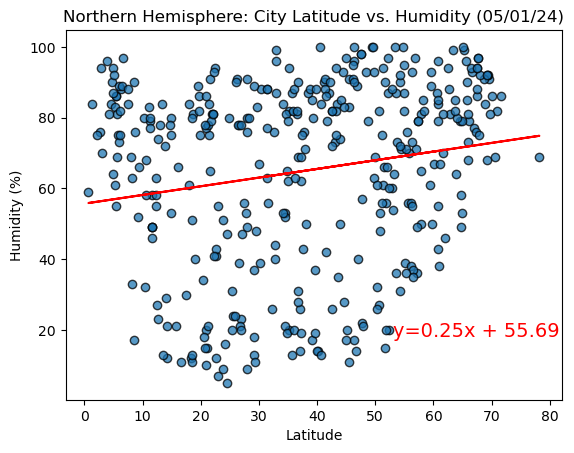

In [11]:
fig, ax, formula = plot_scatter(northern_hemi_df.Lat, northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)',
    f'Northern Hemisphere: City Latitude vs. Humidity ({city_df.iloc[0,8]})', regress=True, 
    edgecolor='black',alpha=.75) 

ax.text(53,18,formula, color='red', fontsize=14)

plt.show()

The r value is: 0.102165145275958


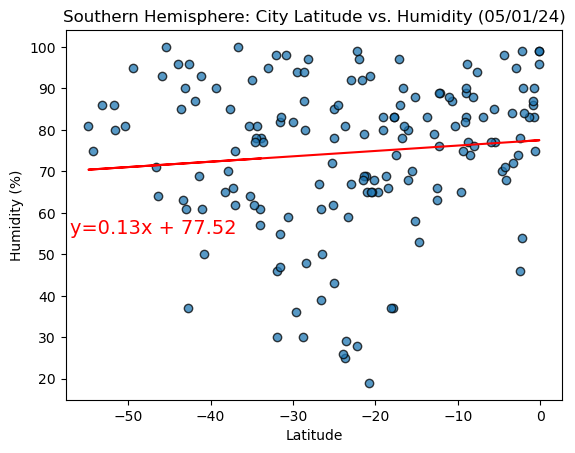

In [12]:
fig, ax, formula = plot_scatter(southern_hemi_df.Lat, southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)',
    f'Southern Hemisphere: City Latitude vs. Humidity ({city_df.iloc[0,8]})', regress=True, 
    edgecolor='black',alpha=.75) 

ax.text(-57,55,formula, color='red', fontsize=14)

plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

#### Observations 
##### Cloudiness vs Latitude
- The low r value close to 0 + the visual of the scatter plot tells us similarly to humidity, that the latitude and cloudiness have close to none or slight positive correlation, meaning, latitude does not seem to have a direct influence on cloudiness %s, but very slightly suggests that with more data it could have a defined relationship, but as is, has no statistical significance.
- This effect is also seen comparing north vs south hemishperes; whether we go closer to the equator or further, the cloudiness has low correlation vs latitude.
- With such a weak correlation, the plots suggest factors other than latitude are more likely to play a bigger part in the determination of cloudiness at each location, to and from the equator. 

The r value is: 0.12762012980064696


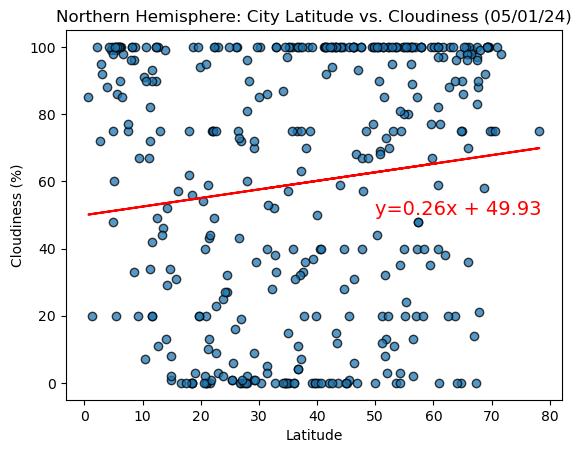

In [13]:
fig, ax, formula = plot_scatter(northern_hemi_df.Lat, northern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)',
                       f'Northern Hemisphere: City Latitude vs. Cloudiness ({city_df.iloc[0,8]})',
                       regress=True, edgecolor='black', alpha=.75) 

ax.text(50,50,formula, color='red', fontsize=14)

plt.show()

The r value is: 0.1796961450038439


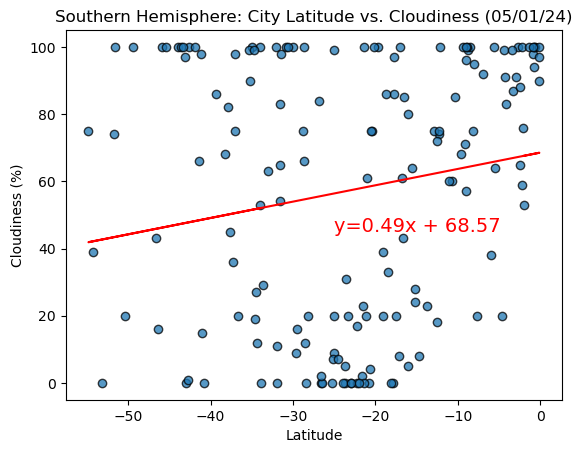

In [14]:
fig, ax, formula = plot_scatter(southern_hemi_df.Lat, southern_hemi_df['Cloudiness'],'Latitude','Cloudiness (%)',
                       f'Southern Hemisphere: City Latitude vs. Cloudiness ({city_df.iloc[0,8]})',
                       regress=True, edgecolor='black', alpha=.75) 

ax.text(-25,45,formula, color='red', fontsize=14)


plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

#### Observations 
##### Wind Speed vs Latitude
- Similar to humidity and cloudiness, wind speed seems to have a very weak correlation vs latitude (distance from equator). 
- With such a weak correlation, the plots suggest factors other than latitude are more likely to play a bigger part in the determination of wind speed at each location, to and from the equator. 


The r value is: -0.1237801925029489


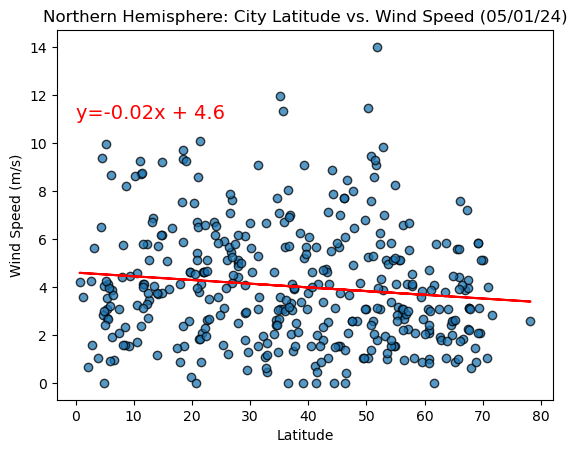

In [15]:
fig, ax, formula = plot_scatter(northern_hemi_df.Lat, northern_hemi_df['Wind Speed'], 'Latitude','Wind Speed (m/s)',
    f'Northern Hemisphere: City Latitude vs. Wind Speed ({city_df.iloc[0,8]})', regress=True,
    edgecolor='black', alpha=.75) 

ax.text(0,11,formula, color='red', fontsize=14)

plt.show()

The r value is: -0.166295544909494


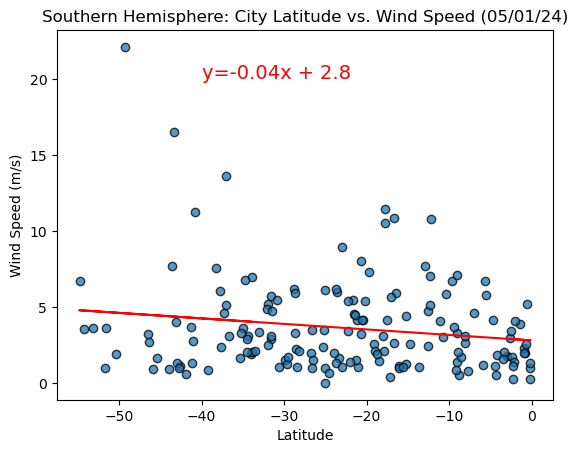

In [16]:
fig, ax, formula = plot_scatter(southern_hemi_df.Lat, southern_hemi_df['Wind Speed'], 'Latitude','Wind Speed (m/s)',
    f'Southern Hemisphere: City Latitude vs. Wind Speed ({city_df.iloc[0,8]})', regress=True,
    edgecolor='black', alpha=.75) 

ax.text(-40,20,formula, color='red', fontsize=14)
plt.show()